# Playing with numpy
## Shifting data:
* given the numpy array `[1,2,3,4,5,6]`, return `[2,3,4,5,6,1]`
* given the numpy array `[1,2,3,4,5,6]`, return `[6,1,2,3,4,5]`
* shift multiple ranks at a time

In [70]:
A = [1,2,3,4,5,6]

B = A[1:]
B.append(A[0])

B = A[1:]
B += A[0:1]

print(B)

[2, 3, 4, 5, 6, 1]


In [71]:
# This is for plotting (see next week)
%matplotlib widget
import matplotlib.pyplot as plt

import numpy as np

In [72]:
nA = np.array(A)
def shiftL(A,step=1):
    res = np.empty( A.shape )
    for i, val in enumerate(A):
        res[i-step] = val
    return res
print(shiftL(nA, 2))

def shiftL2(A,step=1):
    res = np.empty( A.shape )
    n = A.shape[0]
    for i in range(n):
        res[i] = A[(i+step)%n]
    return res
print(shiftL2(nA, -2))

def shift3(A, step=1):
    return np.append(A[step:], A[:step])
    
print(shift3(nA, -2))
print(shift3(nA, 2))



[3. 4. 5. 6. 1. 2.]
[5. 6. 1. 2. 3. 4.]
[5 6 1 2 3 4]
[3 4 5 6 1 2]


In [73]:
n = 11
N = np.arange(n)

def shiftL(u,step=1):
    return 
print(N)
print(shiftL(N,11))


[ 0  1  2  3  4  5  6  7  8  9 10]
None


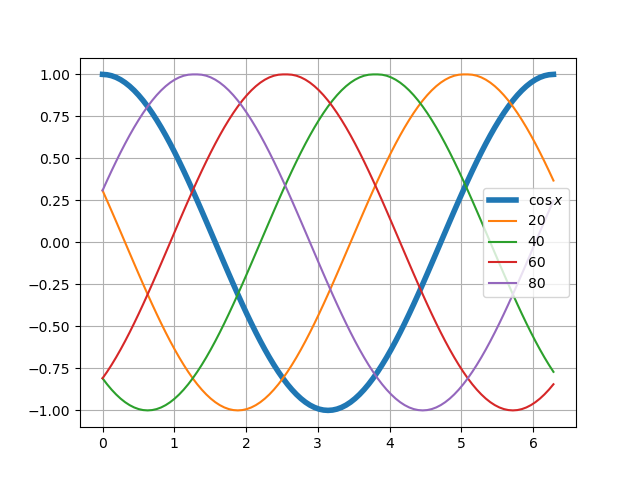

In [81]:

n = 101
p = 20
X = np.linspace(0, 2.*np.pi, n)
Y = np.cos(X)
fig,ax = plt.subplots()
ax.plot(X,Y,linewidth=4, label=r'$\cos x$')
for s in range(1,n//p):
    ax.plot(X,shift3(Y,p*s), label = f'{p*s}')
ax.grid()
ax.legend(loc=0)
# fig.show()

## Polynomials

In [75]:
# import the Polynomial class
from numpy.polynomial import Polynomial

In [76]:
# create a polynomial from coefficients
P = Polynomial([1,2,3])
print(P)
# polynomials can be evaluated
print(P(1))

X = np.array([-1,0,1])
print(P(X))

print(P.coef)


1.0 + 2.0·x + 3.0·x²
6.0
[2. 1. 6.]
[1. 2. 3.]


In [77]:
# All classical algebra on polynomials is implemented:
Q = P * P
print(Q)

R = 2*P +1
print(R)
S = Polynomial([1,2])
print(S(S))

1.0 + 4.0·x + 10.0·x² + 12.0·x³ + 9.0·x⁴
3.0 + 4.0·x + 6.0·x²
3.0 + 4.0·x


In [78]:
# Create polynomials from roots:
roots = [1,2,3]
# P = (x-1) * (x-2) * (x-3)
# P = (-1 + x) * (-2+x) * (-3+x)
# P = [-1,1] * [-2,1] * [3, 1]

P = Polynomial([-1,1]) * Polynomial([-2,1]) * Polynomial([-3,1])
print(P)

P2 = Polynomial.fromroots([1,2,3])
print(P2)



-6.0 + 11.0·x - 6.0·x² + 1.0·x³
-6.0 + 11.0·x - 6.0·x² + 1.0·x³


In [79]:
# calculus with polynomials
Q2 = P2.deriv()
print(Q2)
R2 = Q2.integ()
print(R2)
print(P2)


11.0 - 12.0·x + 3.0·x²
0.0 + 11.0·x - 6.0·x² + 1.0·x³
-6.0 + 11.0·x - 6.0·x² + 1.0·x³


In [80]:
# Solving polynomial equations
P2.roots()

array([1., 2., 3.])

## Vectorizing functions
In order to apply a function to a numpy array, it needs to be vectorized:

In [23]:
x = np.linspace(-1,1,11)
print(x)
print(abs(x))

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[1.  0.8 0.6 0.4 0.2 0.  0.2 0.4 0.6 0.8 1. ]


Let's try to reimplement and apply this function to the `ndarray` `x`:

In [24]:
def myabs(x):
    if x < 0:
        return -x
    else:
        return x
print(myabs(1), myabs(-1))

1 1


In [25]:
print(myabs(x))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

This fails because of the test `if x < 0`, which is ambiguous when `x` is an array. Technically, we don't want to apply this test to `x` but to all element of `x`.

We could rewrite this function to go through all items in `x` (but then it would fail if we call it with `x` being a `float` and we would have to figure out the shape of `x` etc).

We could also use a list comprehension:

In [30]:
absOfx = [myabs(xx) for xx in x]
print(x)
print(absOfx)

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[np.float64(1.0), np.float64(0.8), np.float64(0.6), np.float64(0.3999999999999999), np.float64(0.19999999999999996), np.float64(0.0), np.float64(0.20000000000000018), np.float64(0.40000000000000013), np.float64(0.6000000000000001), np.float64(0.8), np.float64(1.0)]


In [32]:
y = np.array([[-1,2,3],[2,-4,1]])
absOfy = np.empty(y.shape)
for i in range(y.shape[0]):
    for j in range(y.shape[1]):
        absOfy[i,j] = myabs(y[i,j])
print(y)
print(absOfy)
        

[[-1  2  3]
 [ 2 -4  1]]
[[1. 2. 3.]
 [2. 4. 1.]]


A better way is to ask `numpy` to 'vectorize' this function, *i.e.* create a new function tat takes care of all the loops etc:

In [34]:
myabsVect = np.vectorize(myabs)
print(y)
print(myabsVect(y))

[[-1  2  3]
 [ 2 -4  1]]
[[1 2 3]
 [2 4 1]]


## Random numbers

In [35]:
rng = np.random.default_rng()
for i in range(10):
    print(rng.uniform(size=2))

[0.29139288 0.2870192 ]
[0.77481871 0.02057509]
[0.67556001 0.60300731]
[0.88857966 0.50000212]
[0.1711916  0.41274045]
[0.35577481 0.57422694]
[0.77739224 0.40177187]
[0.18340417 0.08471673]
[0.77569794 0.3842326 ]
[0.12242221 0.63890469]


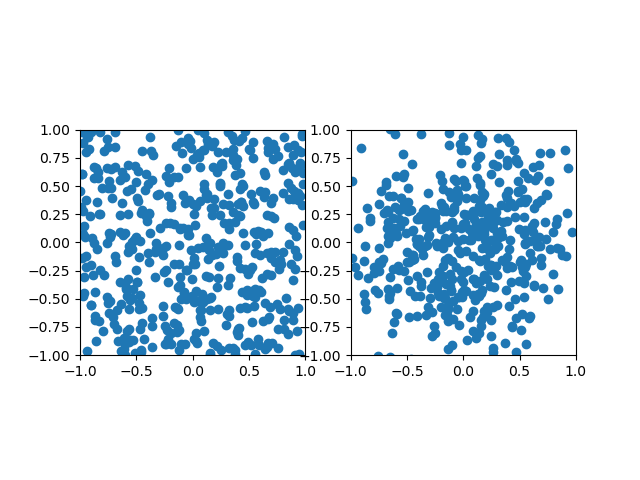

In [54]:
n = 501
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].scatter(rng.uniform(low=-1, high=1, size=n), rng.uniform(low=-1, high=1, size=n))
ax[0].axis([-1,1,-1,1])
ax[0].set_aspect('equal', 'box')
ax[1].scatter(rng.normal(loc=0, scale = 0.5, size=n), rng.normal(loc=0, scale = 0.5, size=n))
ax[1].axis([-1,1,-1,1])
ax[1].set_aspect('equal', 'box')



number of points inside the circle: 78589
probability that a point is insode the circle (estimated): 3.143560


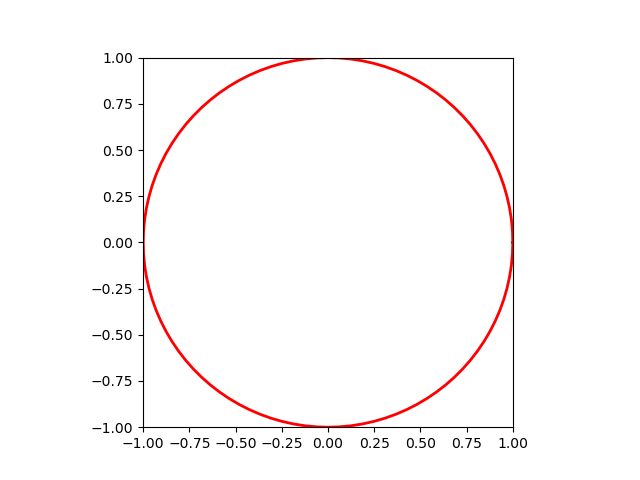

In [69]:
n = 100000
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot([np.cos(theta) for theta in np.linspace(0,2*np.pi,101)],[np.sin(theta) for theta in np.linspace(0,2*np.pi,101)], linewidth=2, color='red')
i = 0
nin = 0
while i < n:
    x,y = rng.uniform(low=-1, high=1, size=2)
    if x**2 + y**2 <= 1:
        nin += 1
        # ax.scatter(x,y, color='red')
    # else:
        # ax.scatter(x,y, color='blue')
    i += 1
ax.axis([-1,1,-1,1])
ax.set_aspect('equal', 'box')

print(f"number of points inside the circle: {nin}")
print(f"probability that a point is inside the circle (estimated): {nin/n*4:f}")